In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn import preprocessing, tree, svm, neighbors, naive_bayes
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [3]:
pd.set_option('display.max_rows', 500)

In [ ]:
## Import data

In [4]:
df = pd.read_excel('[ADD FILE NAME HERE].xlsx')

In [ ]:
## Format as table aggregated by date and time

In [ ]:
df1 = pd.pivot_table(df, index=['hour', 'minute', 'second', 'day', 'month', 'year', 'weekday',
                        'weeknumber', 'quarter', 'semester'], 
                       columns=['descr_item'], values='qtde', aggfunc=np.sum).reset_index().fillna(0)

In [ ]:
## Transform date and time in int

In [7]:
X = df1[['hour', 'minute', 'second', 'day', 'month', 'year', 'weekday',
                        'weeknumber', 'quarter', 'semester']]
X = X.astype(int)

In [ ]:
## Transform date and time per standard scaler

In [8]:
scale = StandardScaler()
X = scale.fit_transform(X.values)

In [ ]:
## Reformat product quantities to int

In [9]:
y = df1[['PRODUCT 1', 'PRODUCT 2', 'PRODUCT 3'...]]
y = y.astype(int)

In [ ]:
## Train Test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [ ]:
## Instantiate Key Nearest Neighbors classifier variable

In [11]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 17)

In [ ]:
## Fit model to an X, Y matrix

In [15]:
knn = knn.fit(X, y)
knn_pred = knn.predict(X)
knn_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
## Train model

In [16]:
knn_train_test = knn.fit(X_train, y_train)
knn_classifier = MultiOutputClassifier(knn_train_test, n_jobs=-1)
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, np.array(y_test))

0.0014513108614232209

In [ ]:
## Test

In [ ]:
## Define which products you would like to predict (y)

In [17]:
y1 = df1[['PRODUCT 1', 'PRODUCT 2', 'PRODUCT 3']
y1 = y1.astype(int)

In [ ]:
## Train test split

In [18]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, train_size=0.8, random_state=1)

In [19]:
knn1 = neighbors.KNeighborsClassifier(n_neighbors = 3)

In [ ]:
## Predict sales (x)

In [20]:
knn1 = knn1.fit(X, y1)
knn1_pred = knn1.predict(X)
knn1_pred

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
## Plot predictions vs actual

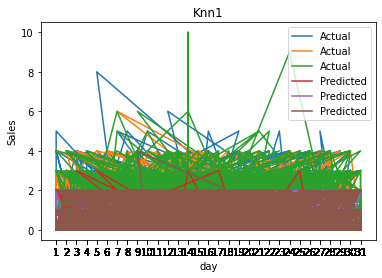

In [21]:
fig, ax = plt.subplots()
ax.plot(df1['day'], y1, label='Actual')
ax.plot(df1['day'], knn1_pred, label='Predicted')
plt.title('Knn1')
plt.xlabel('day')
plt.xticks(df1['day'])
plt.ylabel('Sales')
ax.legend()
plt.show()

In [ ]:
## Calculate precision score

In [22]:
knn1_train_test = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn1_train_test = knn1_train_test.fit(X_train, y1_train)
knn1_classifier = MultiOutputClassifier(knn1_train_test, n_jobs=-1)
knn1_classifier.fit(X_train, y1_train)
knn1_classifier.score(X_test, np.array(y1_test))

0.4309456928838951